In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')

Tahapan Pengerjaan Tugas

1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

In [2]:
def stay_duration_and_cancellation(df):
    df = df.copy()

    # create new feature: total stayed
    df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
    
    # grouping the stay duration per week
    def week_group(row):
        if row < 14:
            return row
        if row >= 14:
            return 14
    
    df['duration_group'] = df['total_stay_duration'].apply(week_group)
    
    # aggregate
    df_agg = df.groupby(['hotel', 'duration_group']).agg({
        "is_canceled": ["sum", "count"]
    })
    df_agg = df_agg.reset_index() 
    df_agg.columns = ['hotel_type', 'duration_group', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_agg['cancellation_rate'] = df_agg['total_cancellation'] * 100 / df_agg['total_booking']
    df_agg['cancellation_rate'] = df_agg['cancellation_rate'].round(2)
    
    return df_agg

df_agg = stay_duration_and_cancellation(df)
df_agg.sample(3)

,hotel_type,duration_group,total_cancellation,total_booking,cancellation_rate
4,City Hotel,5,1257,4144,30.33
23,Resort Hotel,10,226,883,25.59
20,Resort Hotel,7,1593,5627,28.31


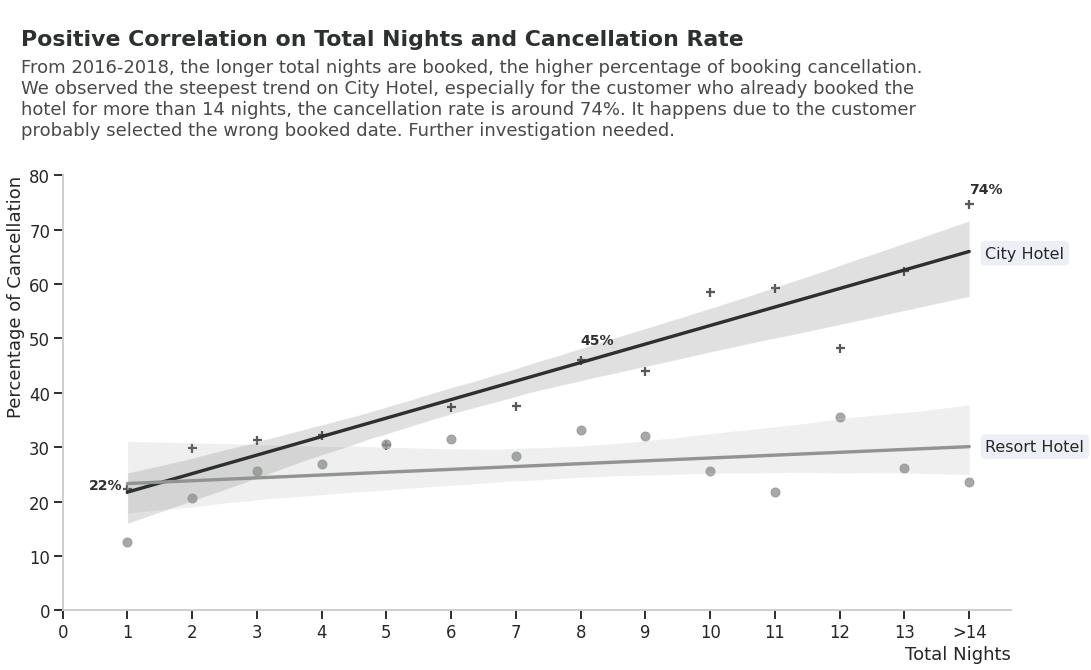

In [4]:
sns.set_theme(context="talk", style="whitegrid")

color_palette = ['#2C302E', '#474A48', '#909590', '#9AE19D', '#537A5A', '#636363']

city = df_agg[df_agg['hotel_type'] == 'City Hotel']
resort = df_agg[df_agg['hotel_type'] == 'Resort Hotel']

fig, ax = plt.subplots(1, 1, figsize=(17, 8), )#dpi=200)
sns.regplot(data=city, x='duration_group', y='cancellation_rate', marker="+", ax=ax, color=color_palette[0])
sns.regplot(data=resort, x='duration_group', y='cancellation_rate', ax=ax, color=color_palette[2])

for position in ['top', 'right']:
    ax.spines[position].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

s = """
Positive Correlation on Total Nights and Cancellation Rate
"""
ax.text(
    x=xmin - 1, 
    y=ymax*1.35, 
    s=s, 
    fontsize=22,
    fontweight='bold',
    color=color_palette[0],
    va='center', 
    ha='left',
)

s = r"""
From 2016-2018, the longer total nights are booked, the higher percentage of booking cancellation.
We observed the steepest trend on City Hotel, especially for the customer who already booked the 
hotel for more than 14 nights, the cancellation rate is around 74%. It happens due to the customer 
probably selected the wrong booked date. Further investigation needed.
"""
ax.text(
    x=xmin - 1, 
    y=ymax*1.21, 
    s=s, 
    fontsize=18,
    color=color_palette[1],
    va='center', 
    ha='left',
)

ax.text(
    x=xmax - 0.4, 
    y=city['cancellation_rate'].iloc[-1] - 9, 
    s='City Hotel', 
    fontsize=16,
    va='center', 
    ha='left', 
    bbox=dict(boxstyle='round,pad=0.3', ec='none', alpha=0.1)
)

ax.text(
    x=xmax - 0.4, 
    y=resort['cancellation_rate'].iloc[-1] + 6.5, 
    s='Resort Hotel', 
    fontsize=16,
    va='center', 
    ha='left', 
    bbox=dict(boxstyle='round,pad=0.3', ec='none', alpha=0.1)
)

ax.set_xticks(range(0, 15, 1), labels=[str(x) for x in range(0, 14, 1)] + ['>14'])

plt.text(x=0.4, y=city['cancellation_rate'].iloc[0], 
         s=f"{int(city['cancellation_rate'].iloc[0])}%", 
         fontsize=14, fontweight='bold', color=color_palette[0])

plt.text(x=8, y=city['cancellation_rate'].iloc[7] + 3, 
         s=f"{int(city['cancellation_rate'].iloc[7])}%", 
         fontsize=14, fontweight='bold', color=color_palette[0])

plt.text(x=14, y=city['cancellation_rate'].iloc[-1] + 2, 
         s=f"{int(city['cancellation_rate'].iloc[-1])}%", 
         fontsize=14, fontweight='bold', color=color_palette[0])

plt.ylabel('Percentage of Cancellation', loc='top')
plt.xlabel('Total Nights', loc='right')
plt.ylim([0, 80])
plt.grid(False)
plt.show()